## Introduction

In this project, I will try to carry out statistical analysis using ANOVA (Analysis of Variance) where we assume that the company wants to see product performance by region.

Background analysis of product performance per region with ANOVA (Analysis of Variance) to measure variability in product performance based on differences between regions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Global Superstore Orders 2016.xlsx')

## Data Prep

### Explore Data

In [4]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.shape

(51290, 24)

There are 51.290 rows and 24 columns on this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  datetime64[ns]
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal_Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product_ID      51290 non-null  object        
 15  Ca

### Data Cleaning

#### Missing Value

In [7]:
df.isnull().sum()

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
Postal_Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product_ID            0
Category              0
Sub-Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

Postal code has 41296 missing values. Since I'm not using it, I will delete that column

In [8]:
# drop Postal_Code column
df.drop('Postal_Code', axis=1, inplace=True)

#### Duplicate

In [9]:
df.duplicated().sum()

0

there's not a single duplicate value spotted on this data set, so we can continue on to the next step

In [10]:
df.shape

(51290, 23)

now our data have 23 columns

In [11]:
# check region and sales columns
df[['Region', 'Sales']]

,Region,Sales
0,Central US,221.980
1,Oceania,3709.395
2,Oceania,5175.171
3,Western Europe,2892.510
4,Western Africa,2832.960
...,...,...
51285,Eastern Asia,65.100
51286,Southern US,16.720
51287,Western US,8.560
51288,South America,13.440


## EDA

### Descriptive statistics

In [12]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
Row_ID -> 51290
Order_ID -> 25728
Order_Date -> 1430
Ship_Date -> 1464
Ship_Mode -> 4
Customer_ID -> 17415
Customer_Name -> 796
Segment -> 3
City -> 3650
State -> 1102
Country -> 165
Region -> 23
Market -> 5
Product_ID -> 3788
Category -> 3
Sub-Category -> 17
Product_Name -> 3788
Sales -> 27200
Quantity -> 14
Discount -> 29
Profit -> 28234
Shipping_Cost -> 16753
Order_Priority -> 4


- there are 25728 order_id
- there are 3650 city
- there are 23 region
- there are 27200 sales

In [13]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.251373


observation result:
- Sales has the lowest sales 0.444 dollar and the highest 22638.48 dollar with average price in about 85.053 dollar
- Quatity has the lowest quantity sold 1 and the highest 14 with average quantity sold in about 3

### Univariate Analysis

#### Numerical

In [14]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])

num = numerical.columns
cat = categorical.columns
print(num)
print(cat)

Index(['Row_ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost'], dtype='object')
Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Order_Priority'],
      dtype='object')


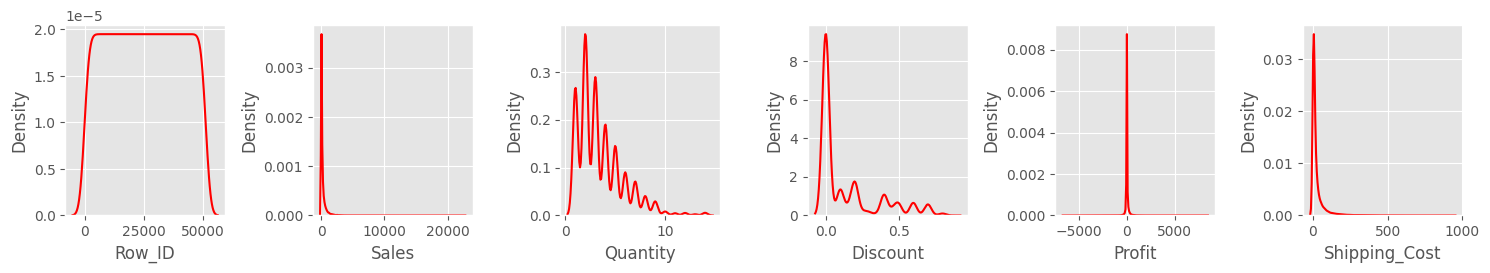

In [15]:
# KDE plot
feat_num = num
for i in range(0, len(feat_num)):
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplot(6, 6, i+1)
    sns.kdeplot(x=df[feat_num[i]], color='red')
    plt.xlabel(feat_num[i])
    plt.tight_layout()

KDE Plot Analysis: It can be seen that Sales, Quantity, Discount, and Shipping_Cost has a positively skewed distribution.

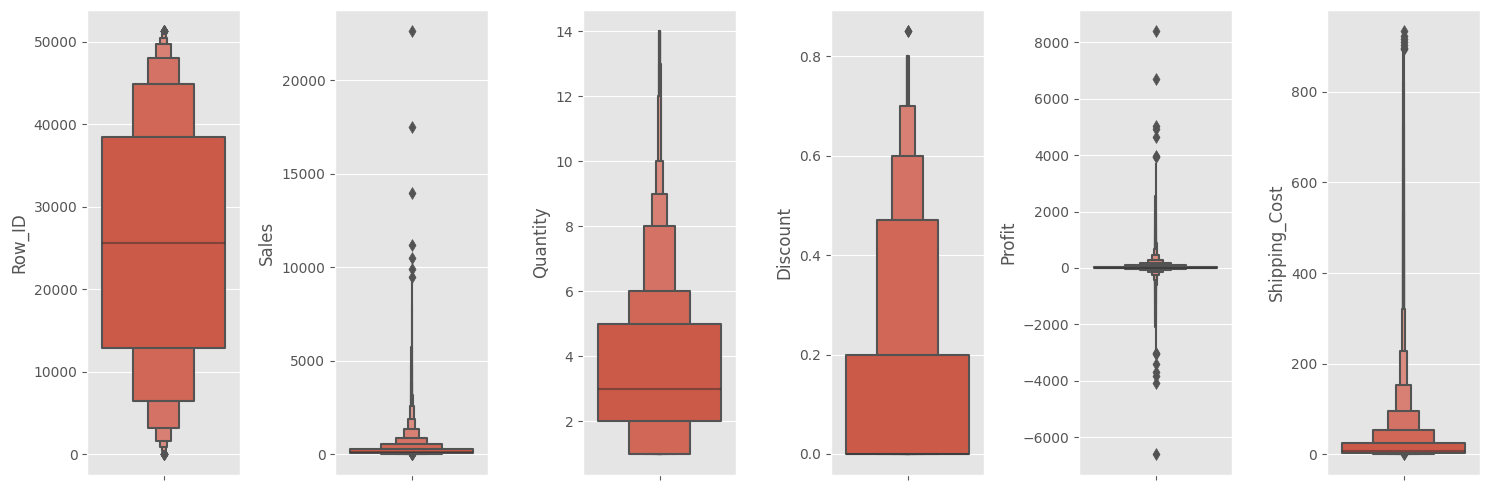

In [21]:
feat_num = num
for i in range(0, len(feat_num)):
    plt.rcParams['figure.figsize'] = (15,5)
    plt.subplot(1,len(feat_num),i+1)
    sns.boxenplot(y=df[feat_num[i]])
    plt.tight_layout() 

In many businesses, it's normal to have occasional spikes or dips due to factors such as seasonal trends, promotions, or special events. These fluctuations may result in outliers, but they are a natural part of business operations.

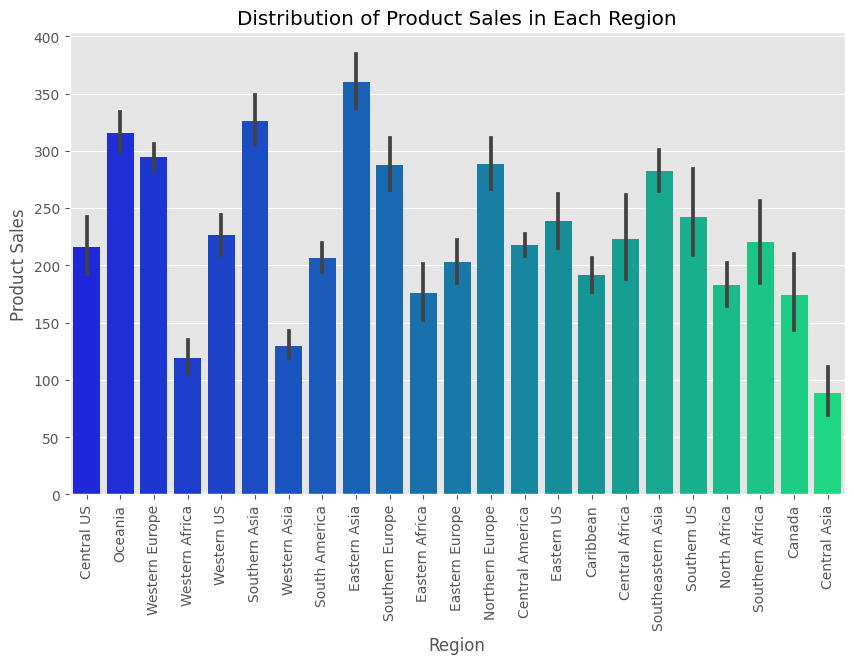

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, palette='winter')
plt.title('Distribution of Product Sales in Each Region')
plt.xlabel('Region')
plt.ylabel('Product Sales')
plt.xticks(rotation=90)
plt.show()

#### Categorical

In [148]:
categorical.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Order_Priority'],
      dtype='object')

In [149]:
feat_cat = categorical.drop(['Order_ID', 'Order_Date', 'Ship_Date', 'Customer_ID', 'Customer_Name',
                    'Product_ID', 'Product_Name', 'City', 'State', 
                    'Country', 'Sub-Category'], axis=1).columns
feat_cat

Index(['Ship_Mode', 'Segment', 'Region', 'Market', 'Category',
       'Order_Priority'],
      dtype='object')

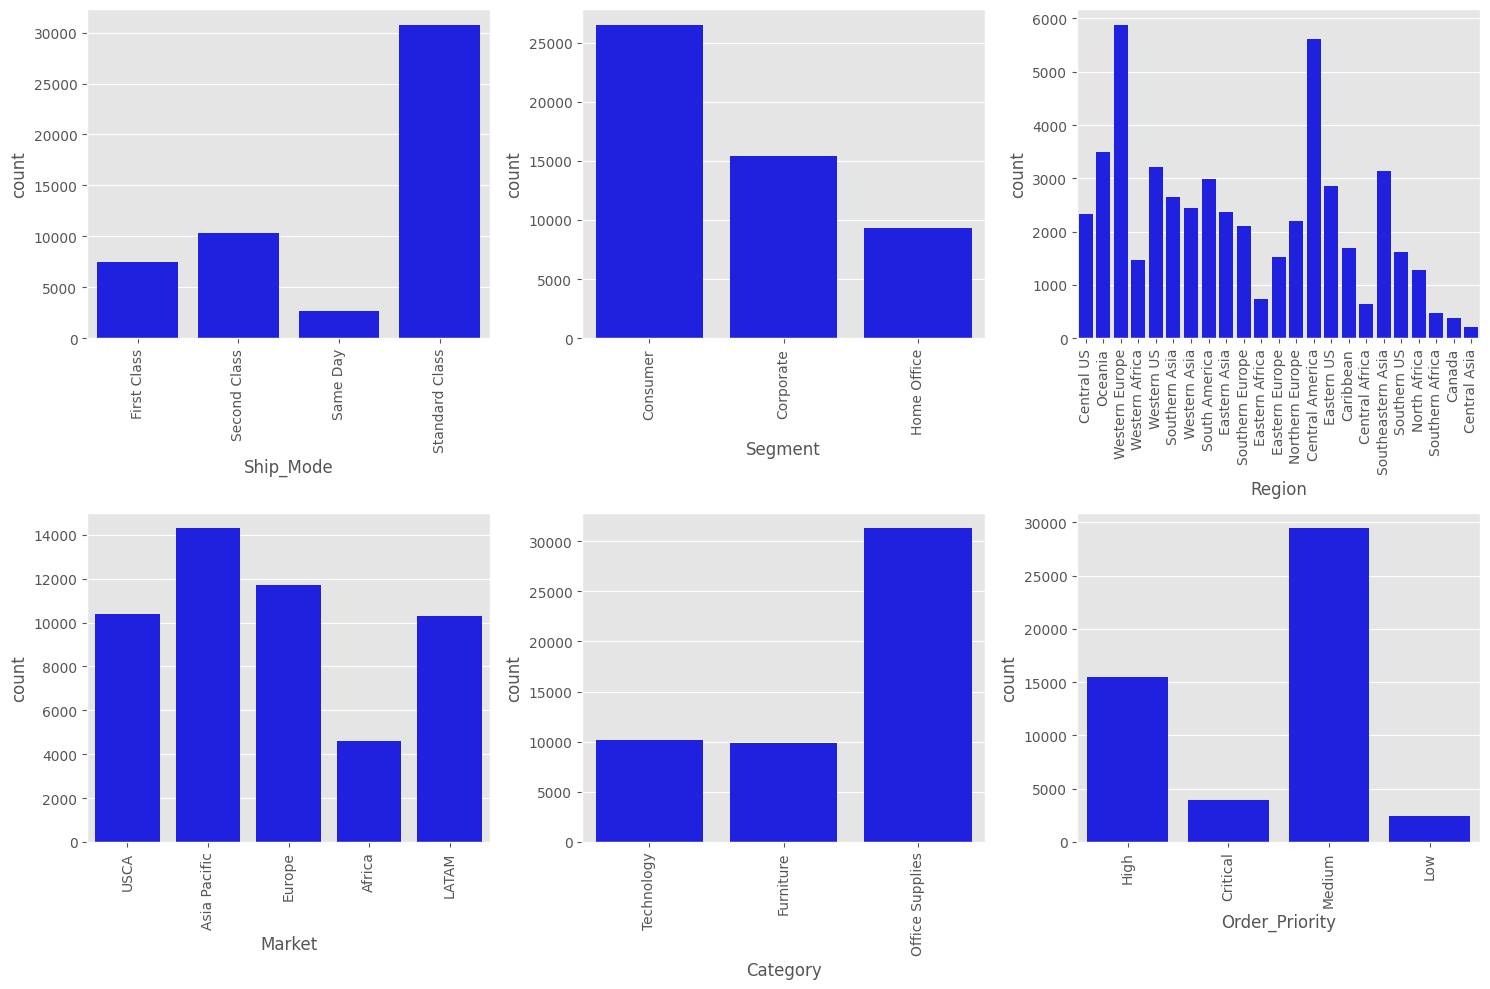

In [150]:
for i in range(0, len(feat_cat)):
    plt.rcParams['figure.figsize'] = (15,10)
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[feat_cat[i]], color='blue')
    plt.xticks(rotation=90)
    plt.tight_layout()

observation result:

- From the plot calculations, it turns out that the customer composition mostly uses standard class for the shipping mode of their goods.
- Western Europe is the largest customer buyer with a gap that tends to be far from other regions except for Central America.
- The most ordered category are office supplies.

#### sub-category with most purchased and least popular

In [151]:
# sub-category with most purchased and least popular
# Group by Sub-Category and count the number of orders
order_subcat_count = df.groupby('Sub-Category')['Order_ID'].count().sort_values(ascending=False)

# select top 5 and bottom 5 
top_5_subcat = order_subcat_count.head(5)
bottom_5_subcat = order_subcat_count.tail(5)

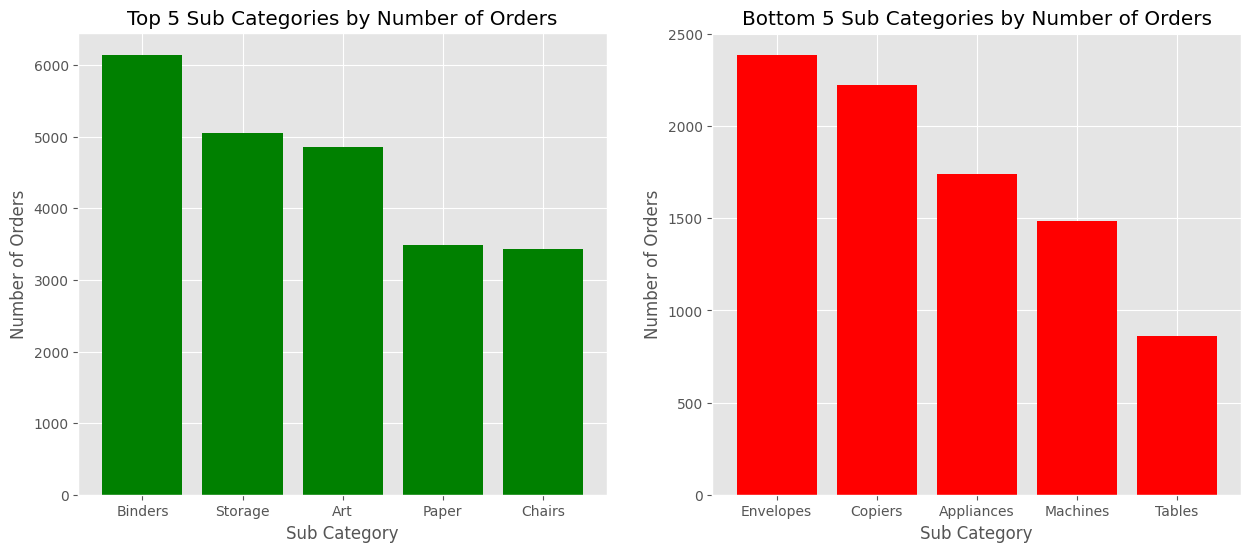

In [152]:
#Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Plot the top 5 categories on the left subplot
ax1.bar(top_5_subcat.index, top_5_subcat.values, color='green')
#ax1.set_xticklabels(top_5_subcat.index, rotation=45)
ax1.set_xlabel('Sub Category')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Top 5 Sub Categories by Number of Orders')

# Plot the bottom 5 categories on the right subplot
ax2.bar(bottom_5_subcat.index, bottom_5_subcat.values, color='red')
#ax2.set_xticklabels(bottom_5_subcat.index, rotation=45)
ax2.set_xlabel('Sub Category')
ax2.set_ylabel('Number of Orders')
ax2.set_title('Bottom 5 Sub Categories by Number of Orders')

# Show the figure
plt.show()

#### distribution of order priority

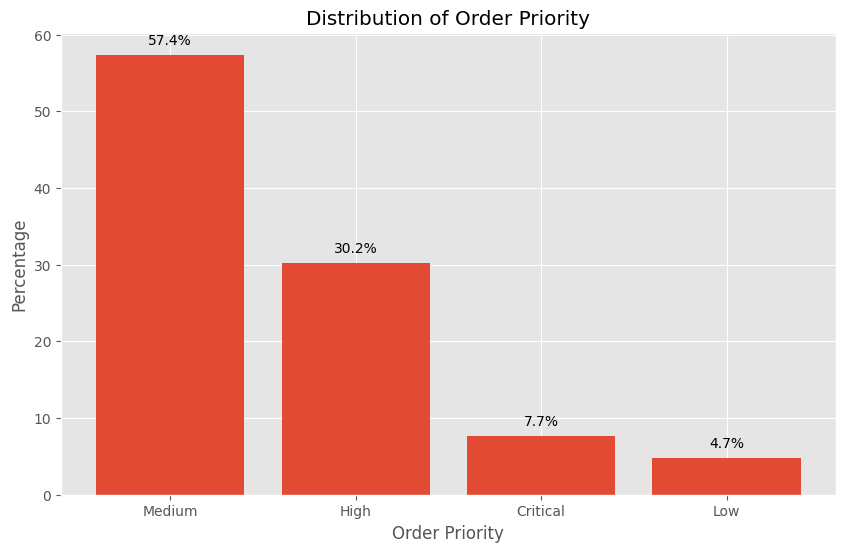

In [153]:
# Calculate the distribution of order priority in percentage
order_status_distribution = df['Order_Priority'].value_counts(normalize=True) * 100

# Sort the distribution
sorted_distribution = order_status_distribution.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_distribution.index, sorted_distribution.values)

# Add percentage values for each order status
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{round(yval, 1)}%', ha='center', va='bottom')

plt.title('Distribution of Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Percentage')
plt.show()

Around 57.4% of order priority is medium

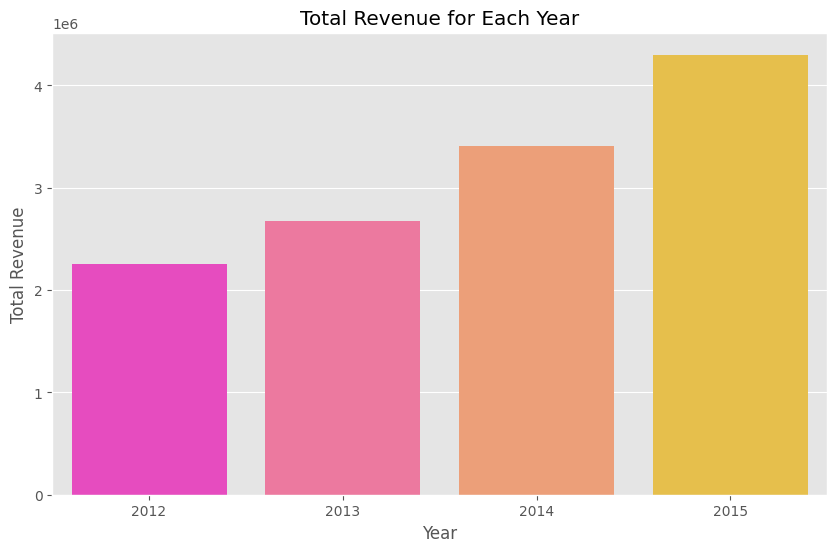

In [154]:
# Extract the year from 'order_date'
df['Year'] = df['Order_Date'].dt.year

# Calculate total revenue for each year
yearly_revenue = df.groupby('Year')['Sales'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values, palette='spring')
plt.title('Total Revenue for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

Every year total revenue increase

## ANOVA test

#### Designing the Hypothesis to Test

The confidence level was 95%, so the significance level(alpha) is 5% or 0.05

- α = 0.05

Null Hypothesis ($H_0$):
- $H_0 : \mu_1 = \mu_2 = \mu_3 = .... = \mu_k$

The null hypothesis states that the means (μ) of product sales across all regions ($k$ regions) are equal.

Alternative Hypothesis ($H_1$):

- $H_1 : \mu_i \not= \mu_j$ (There exists i and j, where $\mu_i \not= \mu_j$ for some i, j)

This signifies that there is evidence to suggest that at least one pair of means is different from each other, indicating regional variations in product sales.

In [155]:
from scipy.stats import f_oneway

In [156]:
regions = df['Region'].unique()
groups = [df['Sales'][df['Region'] == region] for region in regions]

# perform ANOVA
f_statistic, p_value = f_oneway(* groups)

# print the F-statistic and p_value
print('ANOVA F-statistics:', f_statistic)
print('ANOVA p-value:', p_value)

ANOVA F-statistics: 35.76168437710719
ANOVA p-value: 6.163078664079868e-151


Here the t-statistic is 35.76168437710719 and the p-value is 6.163078664079868e-151 <- (explanation below).

- The extremely low p-value (6.163078664079868e-151) is well below a commonly used significance level of 0.05 Therefore, there is strong evidence to reject the null hypothesis ($H_0$), which states that the means of product sales across regions are equal. 

- The conclusion is that there is at least one significant difference in the means of product sales across regions. In other words, the analysis suggests that there are variations in product sales among different regions, and these differences are not likely due to random chance.

#### Explanation : 
(explanation for p-value 6.163078664079868e-151 where e-151 notation is a way to express numbers in scientific notation or exponential form. In this case, e-151 means multiplying the previous number by 10 to the power − 151.

Ex:

6.163078664079868×10^-151

That is, we take 6.163078664079868, then multiply it by 10 to the power −151. Mathematically, this can be described as:

$6.163078664079868 * 10{^-}{^1}{^5}{^1} = \frac{6.163078664079868}{10{^1}{^5}{^1}}$

This is a very small number, close to zero. Exponential notation is used to deal with very large or very small numbers in scientific and mathematical contexts. In the context of the p value (p-value) in statistics, a very small value (p < 0.05 atau p < 0.01) indicates strong evidence to reject the null hypothesis.)

## Post-Hoc Tests ANOVA  product performance by region

In [160]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA
model = sm.formula.ols('Sales ~ Region', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print("ANOVA Table:")
print(anova_table)

# Perform Tukey HSD test for post-hoc analysis
tukey_results = pairwise_tukeyhsd(df['Sales'], df['Region'])

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Table:
                sum_sq       df          F         PR(>F)
Region    1.842801e+08     22.0  35.761684  6.163079e-151
Residual  1.200814e+10  51267.0        NaN            NaN

Tukey HSD Results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2       meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------
           Canada         Caribbean   17.5901    1.0  -81.3391  116.5192  False
           Canada    Central Africa   49.0827 0.9964   -63.778  161.9434  False
           Canada   Central America   43.4965 0.9897  -48.8085  135.8015  False
           Canada      Central Asia  -85.2992 0.9126 -233.9169   63.3185  False
           Canada        Central US   41.4806 0.9969  -54.9207  137.8818  False
           Canada    Eastern Africa    1.3343    1.0 -109.0354   111.704  False
           Canada      Eastern Asia  185.8846    0.0   89.6303  282.1388 

- Region: The F-statistic of 35.76 with an extremely low p-value (6.16e-151) suggests that there are significant differences in product performance across regions.

The Tukey Honestly Significant Difference (HSD) test is conducted to identify which specific regions exhibit statistically significant differences in product performance. The results are presented in a pairwise manner:

- Canada vs. Eastern Asia: Statistically significant difference (reject the null hypothesis).
- Canada vs. Northern Europe: Statistically significant difference.
- Canada vs. Oceania: Statistically significant difference.
- Canada vs. Southeastern Asia: Statistically significant difference.
- Canada vs. Southern Asia: Statistically significant difference.
- Canada vs. Southern Europe: Statistically significant difference.
- Canada vs. Western Europe: Statistically significant difference.

Several other pairwise comparisons also show significant differences, including comparisons involving regions such as Central Asia, Eastern Asia, South America, and Western Africa.

## Recommendation

1. Market Segmentation:

- In order to enhance our market presence, I advocate for segmenting our target market based on the unique regional differences. It's crucial that we tailor our marketing and product strategies to precisely address the distinct needs and preferences of customers in each region. By doing so, we can significantly boost our relevance and appeal in diverse markets.

2. Customer Feedback and Engagement:

- I strongly recommend actively seeking feedback from our valued customers across different regions. It's imperative that we delve into their experiences, understand their preferences, and identify any challenges they may be facing. This invaluable information will serve as a cornerstone for continuous improvement, allowing us to refine our products and services to better meet customer expectations.

3. Collaboration with Local Partners:

- As part of strategic approach, I propose considering the establishment of partnerships with local businesses or influencers. Collaborating with these local partners can provide us with deep insights into regional nuances, enhance our brand's credibility, and offer guidance in navigating the unique aspects of each region. This collaborative effort can significantly bolster our market presence and resonance.